# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [162]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,KFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [62]:
df = pd.read_csv("D:\\Programming\\Machine Learning\\Projects\\Survival rate prediction - titanic dataset\\train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Preprocessing

### Handling Missing Values and Droping unrelavent data

In [63]:
df.shape

(891, 12)

Remove Cabin, Tickets,passengerId and Name columns

In [64]:
df.drop(["PassengerId","Name","Ticket","Cabin"],inplace=True,axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [65]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [66]:
df["Age"] = df["Age"].fillna(int(df["Age"].mean()))

In [67]:
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [68]:
df["Embarked"] = df["Embarked"].fillna("S")

In [69]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [70]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Encode with LabelEncoder and OneHotEncoder 

In [71]:
le = LabelEncoder()

In [72]:
df["Sex"] = le.fit_transform(df["Sex"])

In [73]:
ohe = OneHotEncoder(sparse=False)

In [74]:
hot_encoded_df = ohe.fit_transform(df[["Embarked"]])

C:\Users\user\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Important : Convert the one-hot encoded data to a DataFrame

In [75]:
ohe.get_feature_names_out()

array(['Embarked_C', 'Embarked_Q', 'Embarked_S'], dtype=object)

In [76]:
encoded_df = pd.DataFrame(hot_encoded_df, columns=ohe.get_feature_names_out(input_features=['Embarked']))

In [77]:
df = pd.concat([df,encoded_df],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,S,0.0,0.0,1.0
1,1,1,0,38.0,1,0,71.2833,C,1.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,S,0.0,0.0,1.0
3,1,1,0,35.0,1,0,53.1000,S,0.0,0.0,1.0
4,0,3,1,35.0,0,0,8.0500,S,0.0,0.0,1.0


In [78]:
df.drop(["Embarked","Embarked_S"],inplace=True,axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q
0,0,3,1,22.0,1,0,7.2500,0.0,0.0
1,1,1,0,38.0,1,0,71.2833,1.0,0.0
2,1,3,0,26.0,0,0,7.9250,0.0,0.0
3,1,1,0,35.0,1,0,53.1000,0.0,0.0
4,0,3,1,35.0,0,0,8.0500,0.0,0.0


## Reindex Columns

In [89]:
col_names = df.columns.to_list()
new_idx_labels = col_names[1:]+[col_names[0]]
new_idx_labels

['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked_C',
 'Embarked_Q',
 'Survived']

In [90]:
df_reordered= df[new_idx_labels]
df_reordered.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Survived
0,3,1,22.0,1,0,7.2500,0.0,0.0,0
1,1,0,38.0,1,0,71.2833,1.0,0.0,1
2,3,0,26.0,0,0,7.9250,0.0,0.0,1
3,1,0,35.0,1,0,53.1000,0.0,0.0,1
4,3,1,35.0,0,0,8.0500,0.0,0.0,0


# Visualization

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\user\AppData\Local\Temp\ipykernel_14072\2418460452.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

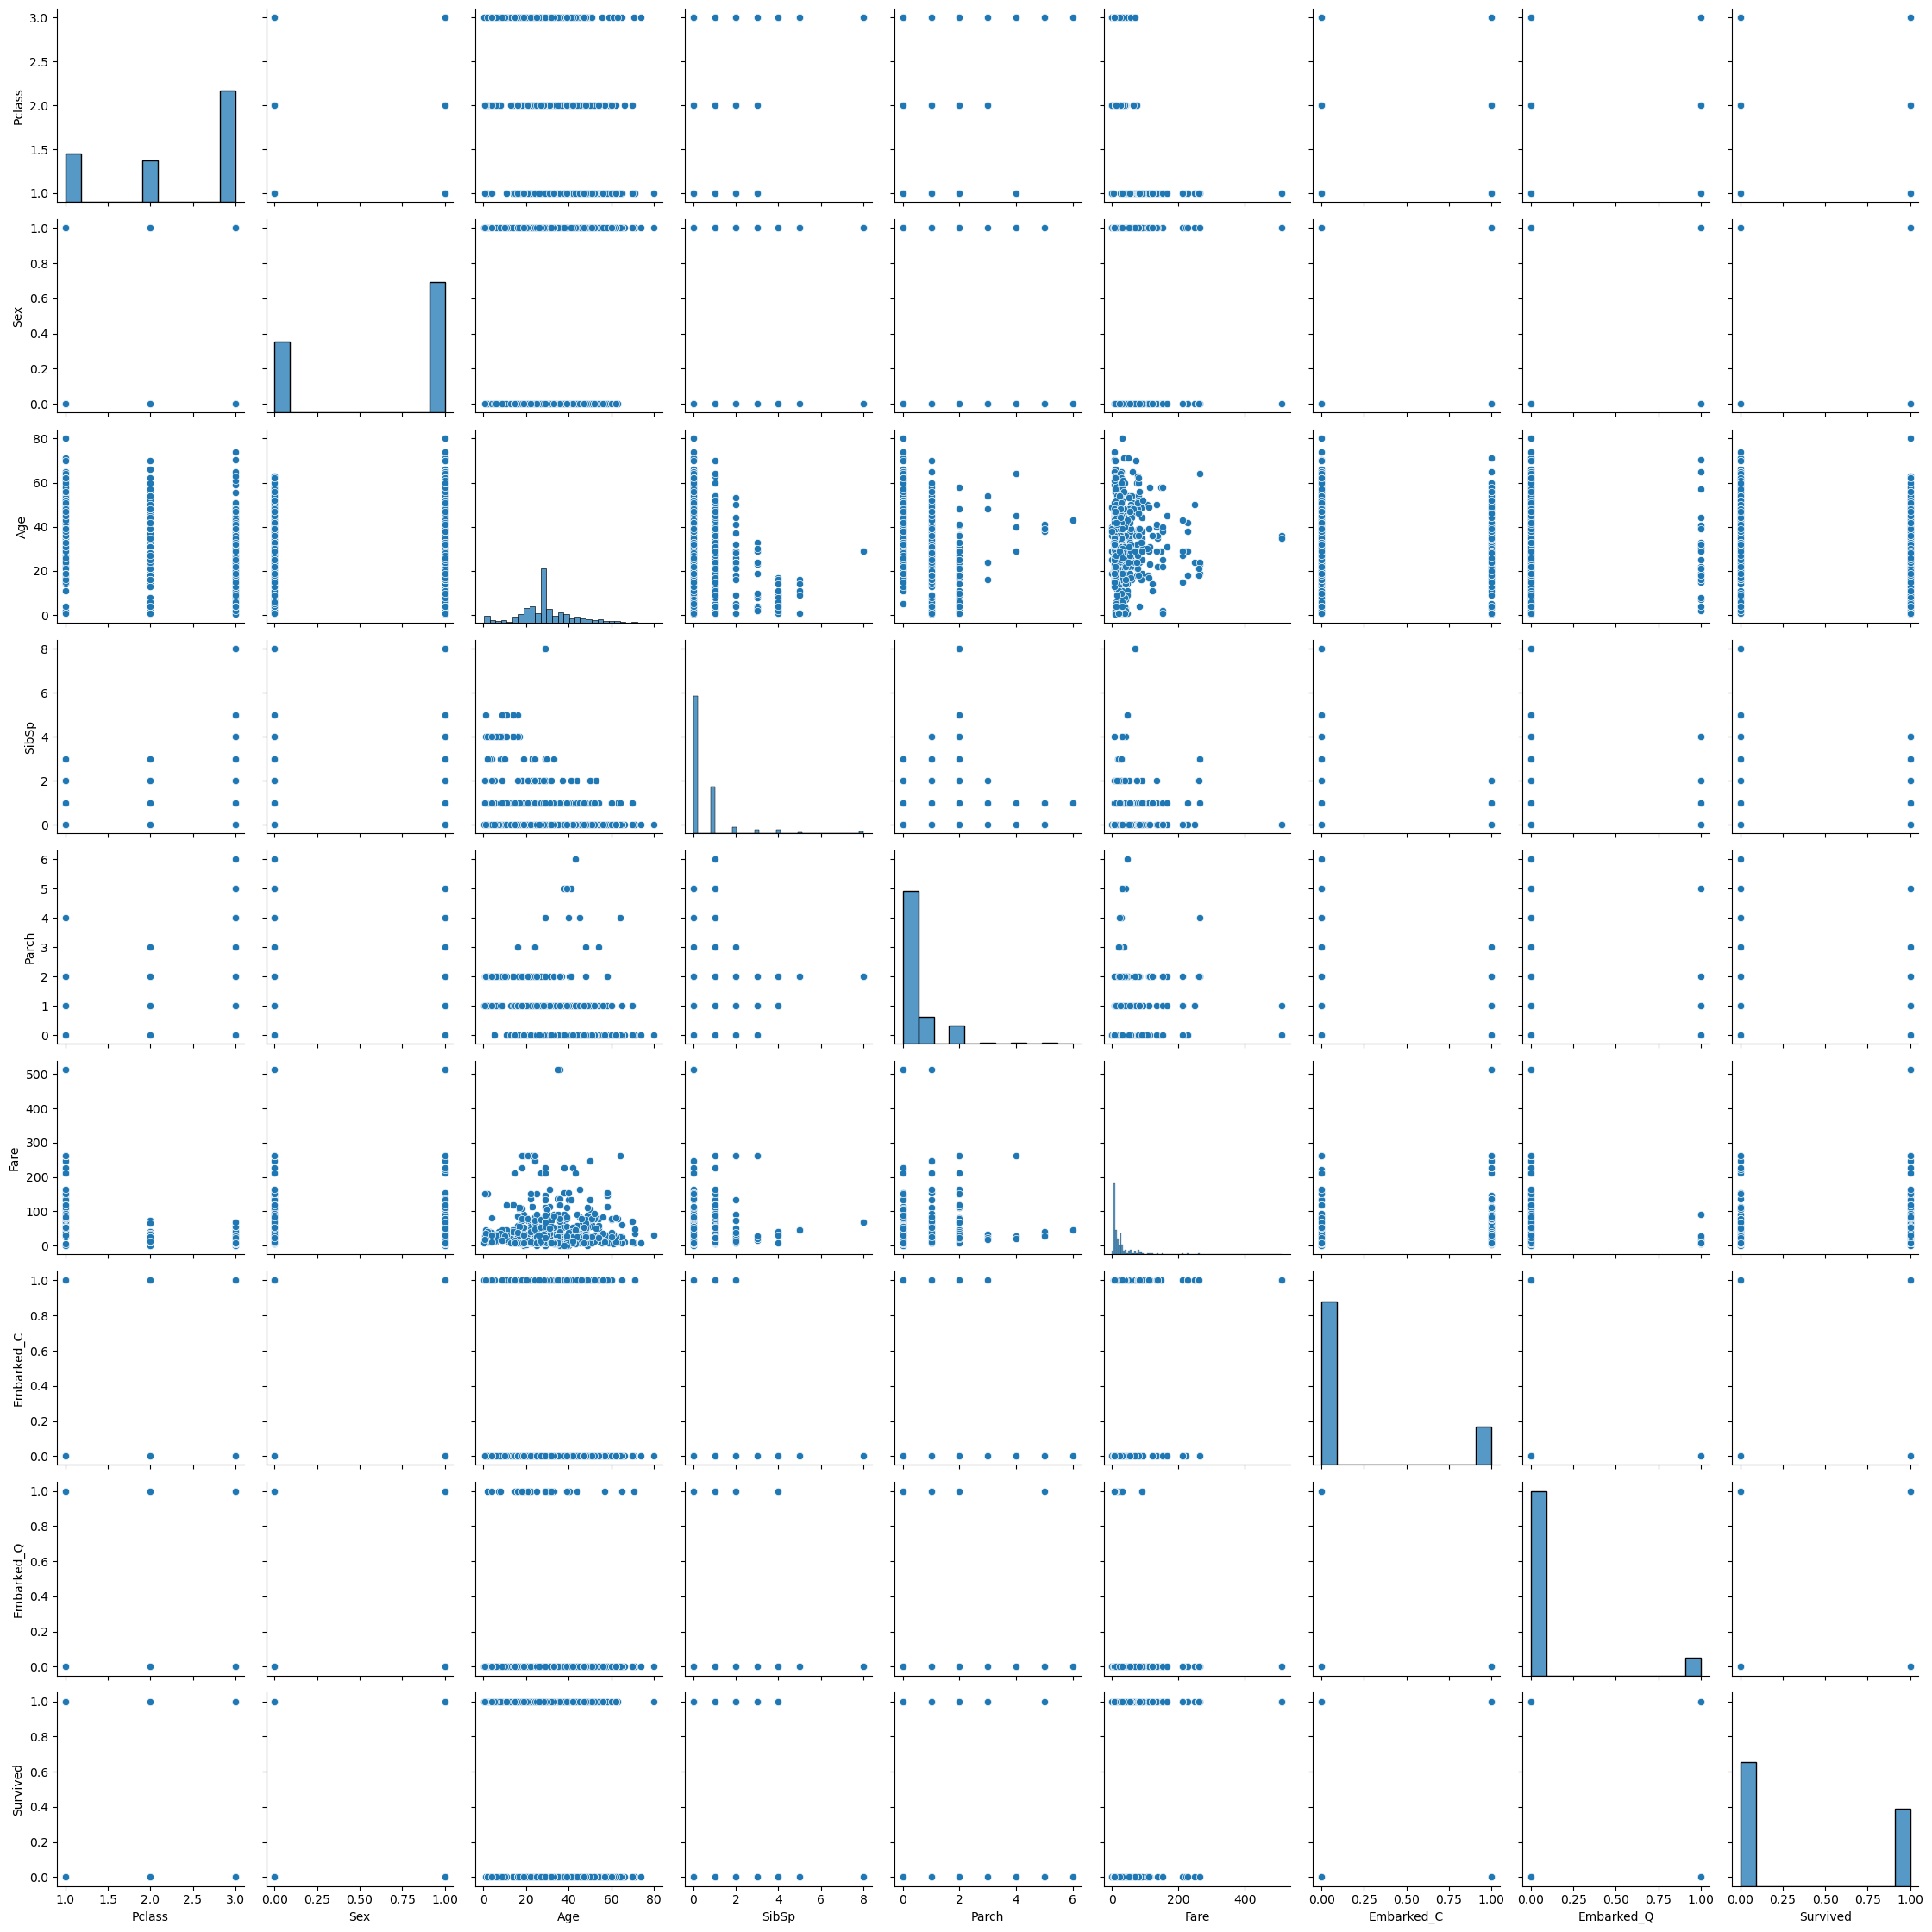

In [91]:
plt.figure()
sns.pairplot(df_reordered)
plt.tight_layout()
plt.show()

# Data Preperation

In [110]:
X = df_reordered.iloc[:,:len(df_reordered.columns)-1].values
y = df_reordered.iloc[:,len(df_reordered.columns)-1].values

In [112]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Machine Learning Model Implementataion

In [145]:
Accuracy_of_each_model = {}

## 1. Logistic Regression

In [146]:
# Create a logistic regression model
logistic_model = LogisticRegression()

# Train the model on the training data
logistic_model.fit(X_train,y_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [147]:
#make Predictions
y_pred = logistic_model.predict(X_test)
lr_accuracy = accuracy_score(y_pred,y_test)
Accuracy_of_each_model["Logistic Regression"]=lr_accuracy
print(f"Accuracy score : ",lr_accuracy)

Accuracy score :  0.8044692737430168


# 2. KNeighbors Classifier

In [148]:
knc = KNeighborsClassifier(n_neighbors=2)

In [149]:
knc.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [150]:
ypred_knc = knc.predict(X_test)
knc_accuracy = accuracy_score(ypred_knc,y_test)
Accuracy_of_each_model["KNeighbor Classifier"]=knc_accuracy
print(f"Accuracy score : ",knc_accuracy)

Accuracy score :  0.7039106145251397


# 3. DecisionTree Classifier

In [140]:
clf = DecisionTreeClassifier()

In [141]:
# Define the hyperparameters and their values to search
params = {'criterion': ['gini', 'entropy']}

# Fit the GridSearchCV
gsearch = GridSearchCV(estimator=clf,param_grid=params,cv=5)
gsearch.fit(X_train,y_train)

# Get the best parameters and best score
best_params = gsearch.best_params_
best_score = gsearch.best_score_


print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

Best Parameters: {'criterion': 'gini'}
Best Cross-Validation Score: 0.7570373288683148


In [144]:
model = DecisionTreeClassifier(criterion="gini")

In [151]:
model.fit(X_train,y_train)
ypred_clf = model.predict(X_test) 
clf_accuracy = accuracy_score(ypred_clf,y_test)
Accuracy_of_each_model["Decesiontree Classifier"]=clf_accuracy
print(f"Accuracy score : ",clf_accuracy)

Accuracy score :  0.776536312849162


# 4. Random Forest Classifier

In [154]:
rfc = RandomForestClassifier()

In [155]:
params = {"n_estimators" : [100,200,400,500],
         "criterion" : ["gini", "entropy"]}

gsearch = GridSearchCV(estimator=rfc,param_grid=params,cv=5)
gsearch.fit(X_train,y_train)

# Get the best parameters and best score
best_params = gsearch.best_params_
best_score = gsearch.best_score_


print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

Best Parameters: {'criterion': 'gini', 'n_estimators': 200}
Best Cross-Validation Score: 0.7949571555205358


In [156]:
model = RandomForestClassifier(criterion= 'gini', n_estimators = 200)
model.fit(X_train,y_train)
ypred_rfc = model.predict(X_test)
rfc_accuracy = accuracy_score(ypred_rfc,y_test)
Accuracy_of_each_model["Randomforest Classifier"]=rfc_accuracy
print(f"Accuracy score : ",rfc_accuracy)

Accuracy score :  0.8156424581005587


# 5. ExtraTrees Classifier

In [158]:
extc = ExtraTreesClassifier()

In [160]:
params = {"n_estimators" : [100,200,400,500],
         "criterion" : ["gini", "entropy"]}

gsearch = GridSearchCV(estimator=extc,param_grid=params,cv=5)
gsearch.fit(X_train,y_train)

# Get the best parameters and best score
best_params = gsearch.best_params_
best_score = gsearch.best_score_


print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

Best Parameters: {'criterion': 'gini', 'n_estimators': 400}
Best Cross-Validation Score: 0.7851176992022063


In [161]:
model = ExtraTreesClassifier(criterion= 'gini', n_estimators = 400)
model.fit(X_train,y_train)
ypred_extc = model.predict(X_test)
extc_accuracy = accuracy_score(ypred_extc,y_test)
Accuracy_of_each_model["Extratrees Classifier"]=extc_accuracy
print(f"Accuracy score : ",extc_accuracy)

Accuracy score :  0.7988826815642458


# 6. Voting Classifier

In [163]:
classifier1 = DecisionTreeClassifier(random_state=42)
classifier2 = SVC(probability=True,random_state=42)
classifier3 = LogisticRegression(random_state=42)

voting_clf = VotingClassifier(estimators=[("DT",classifier1),
                                          ("SVC",classifier2),
                                          ("LR",classifier3)],
                             voting="soft")

voting_clf.fit(X_train,y_train)
ypred_vot = voting_clf.predict(X_test)
vot_accuracy = accuracy_score(ypred_vot,y_test)
Accuracy_of_each_model["Voting Classifier"]=vot_accuracy
print(f"Accuracy score : ",vot_accuracy)

Accuracy score :  0.8268156424581006


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 7. Support Vector Classifier

In [165]:
svc = SVC()

In [166]:
params = {"C" : [0.5,1,1.5],
          "kernel":['linear', 'poly', 'rbf', 'sigmoid']}

gsearch = GridSearchCV(estimator=svc,param_grid=params,cv=5)
gsearch.fit(X_train,y_train)

# Get the best parameters and best score
best_params = gsearch.best_params_
best_score = gsearch.best_score_


print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

Best Parameters: {'C': 0.5, 'kernel': 'linear'}
Best Cross-Validation Score: 0.7865261499064315


In [169]:
model = SVC(C=0.5,kernel="linear")
model.fit(X_train,y_train)
ypred_svc = model.predict(X_test)
svc_accuracy = accuracy_score(ypred_svc,y_test)
Accuracy_of_each_model["SupportVector Classifier"]=svc_accuracy
print(f"Accuracy score : ",svc_accuracy)

Accuracy score :  0.7877094972067039


# Deep Learning Implementations

In [172]:
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential

## Create Nueral Network

In [214]:
model = Sequential()
model.add(Dense(32,activation="relu",input_shape=(X.shape[1],)))
model.add(Dense(32,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

## Optimize the Nueral Network

In [215]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

## Train the Nueral Network

In [216]:
model.fit(X_train,y_train,epochs=80,validation_batch_size=0.2)

Epoch 1/80
23/23 [==============================] - 1s 2ms/step - loss: 2.0139 - accuracy: 0.4157
Epoch 2/80
23/23 [==============================] - 0s 2ms/step - loss: 0.7662 - accuracy: 0.6447
Epoch 3/80
23/23 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.6292
Epoch 4/80
23/23 [==============================] - 0s 2ms/step - loss: 0.6677 - accuracy: 0.6250
Epoch 5/80
23/23 [==============================] - 0s 2ms/step - loss: 0.6250 - accuracy: 0.6615
Epoch 6/80
23/23 [==============================] - 0s 2ms/step - loss: 0.6243 - accuracy: 0.6629
Epoch 7/80
23/23 [==============================] - 0s 2ms/step - loss: 0.6129 - accuracy: 0.6854
Epoch 8/80
23/23 [==============================] - 0s 2ms/step - loss: 0.6130 - accuracy: 0.6643
Epoch 9/80
23/23 [==============================] - 0s 2ms/step - loss: 0.6039 - accuracy: 0.6980
Epoch 10/80
23/23 [==============================] - 0s 2ms/step - loss: 0.5931 - accuracy: 0.7051
Epoch 11/80
23/23 [

In [217]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

6/6 [==============================] - 0s 2ms/step - loss: 0.4766 - accuracy: 0.7654
Test loss: 0.47655487060546875
Test accuracy: 0.7653631567955017


In [218]:
Accuracy_of_each_model["Nueral Network"]=accuracy

In [219]:
df = pd.DataFrame(Accuracy_of_each_model,index=["Accuracy Score"])
df_vertical = df.T
df_vertical

,Accuracy Score
Logistic Regression,0.804469
KNeighbor Classifier,0.703911
Decesiontree Classifier,0.776536
Randomforest Classifier,0.815642
Extratrees Classifier,0.798883
Voting Classifier,0.826816
SupportVector Classifier,0.787709
Nueral Network,0.765363


Loss Functions

"mean_squared_error" (MSE) / L2 Loss: Used for regression problems.

"mean_absolute_error" (MAE) / L1 Loss: Also used for regression problems.

"binary_crossentropy" Loss (Log Loss): Used for binary classification problems.

"categorical_crossentropy" Loss: Used for multi-class classification problems.

"sparse_categorical_crossentropy" Loss: Similar to categorical cross-entropy but used when the target labels are integers (not one-hot encoded).
